In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
# Get the data
data = et.data.get_data('cold-springs-fire')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# [**Følgende er lavet efter denne guide!**](https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/vegetation-indices-NDVI-in-python/)

In [25]:
with rio.open("data/cold-springs-fire/naip/m_3910505_nw_13_1_20150919/crop/m_3910505_nw_13_1_20150919_crop.tif") as src:
    naip_data = src.read()

# View shape of the data
naip_data.shape

(4, 2312, 4377)

In [0]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

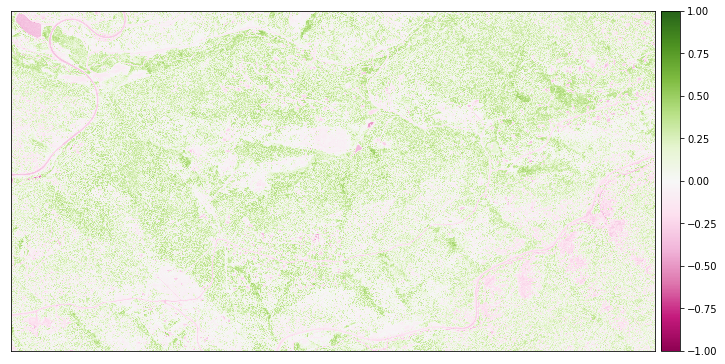

In [27]:
ep.plot_bands(naip_ndvi, cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1)
plt.show()

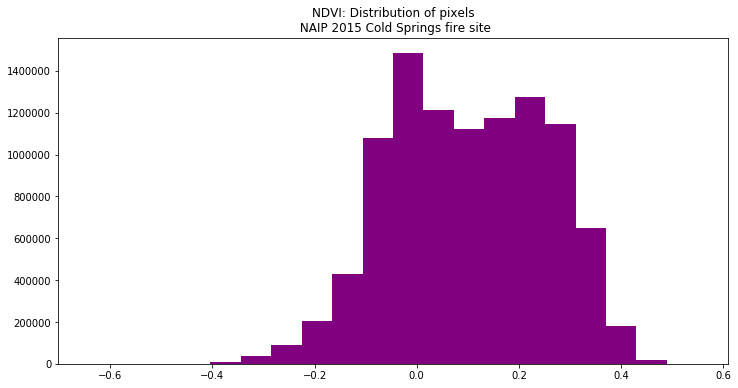

In [28]:
ep.hist(naip_ndvi,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])
plt.show()

# **[Følgende er generet efter denne guide!](https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/landsat-bands-geotif-in-Python/)**

In [32]:
!ls data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/


LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif
LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif


In [40]:
from glob import * 
all_landsat_post_bands = glob("data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/*band*.tif")
all_landsat_post_bands.sort()
all_landsat_post_bands

['data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'data/cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_201801

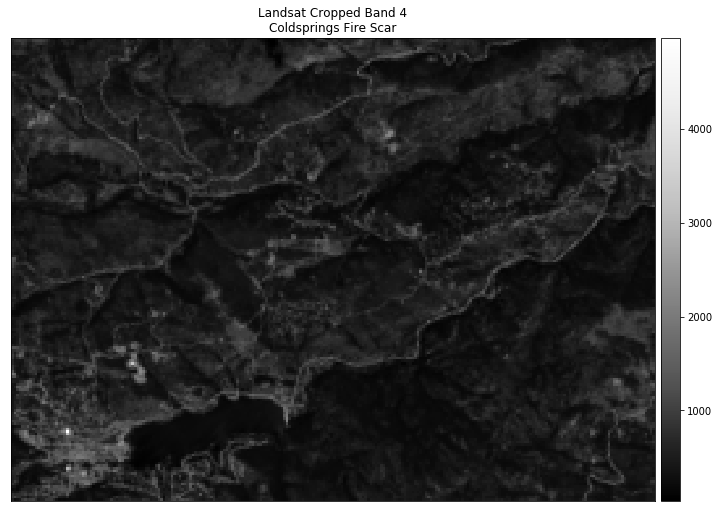

In [41]:
with rio.open(all_landsat_post_bands[3]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat Cropped Band 4\nColdsprings Fire Scar",
              scale=False)
plt.show()

In [0]:
landsat_post_fire_path = "data/cold-springs-fire/outputs/landsat_post_fire.tif"
# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(all_landsat_post_bands,
                                 landsat_post_fire_path)

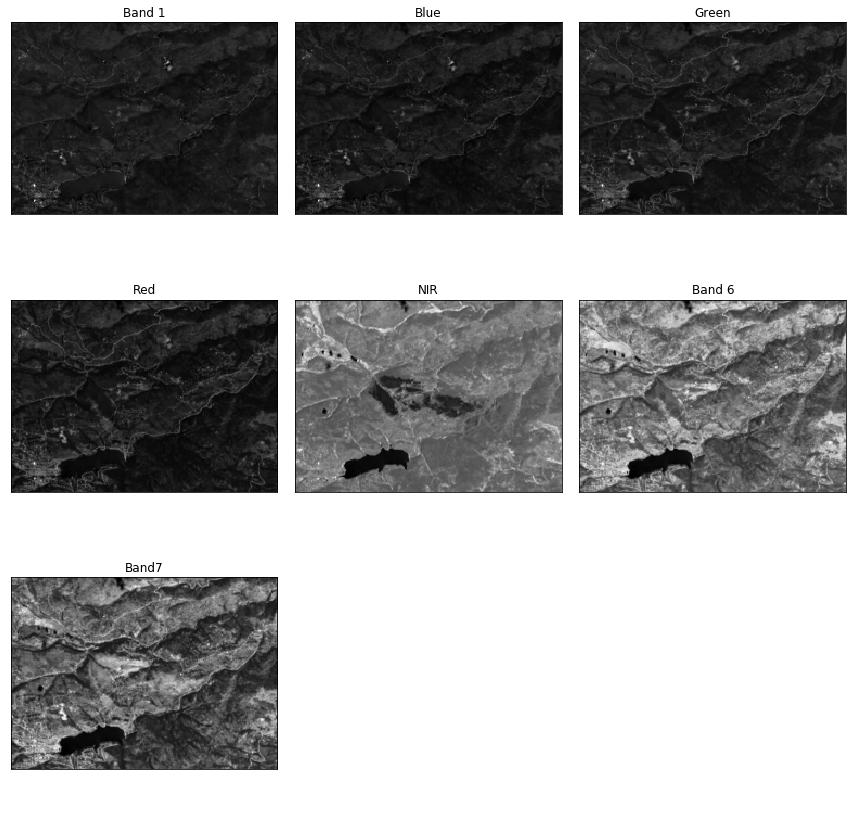

In [44]:
with rio.open(landsat_post_fire_path) as src:
    landsat_post_fire = src.read()
    
# Plot all bands using earthpy
band_titles = ["Band 1", "Blue", "Green", "Red", "NIR",
               "Band 6", "Band7"]

ep.plot_bands(landsat_post_fire,
              title=band_titles, cbar=False)
plt.show()

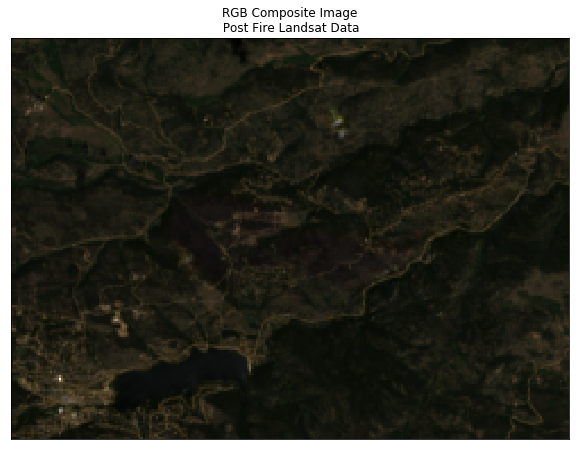

In [45]:
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Post Fire Landsat Data")
plt.show()

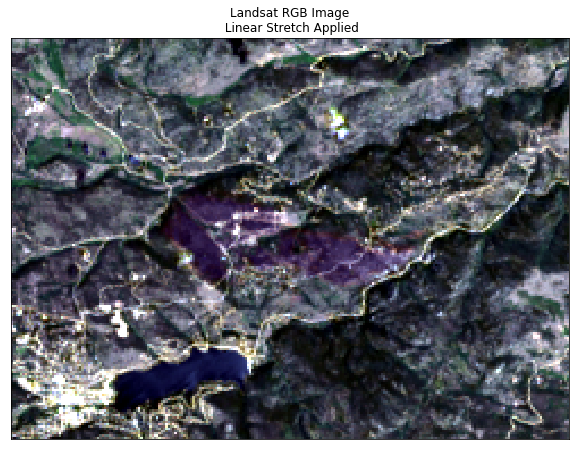

In [47]:
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=1)
plt.show()

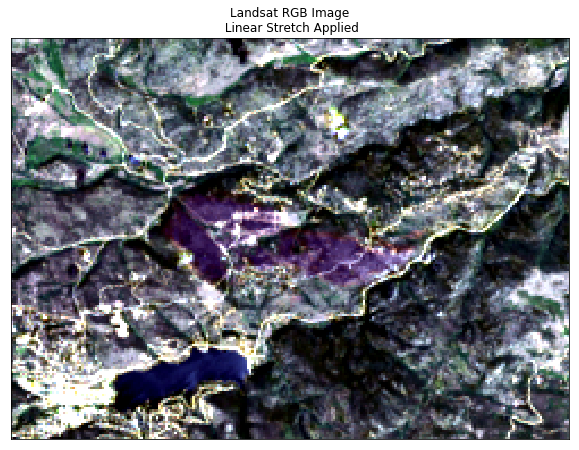

In [48]:
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=4)
plt.show()

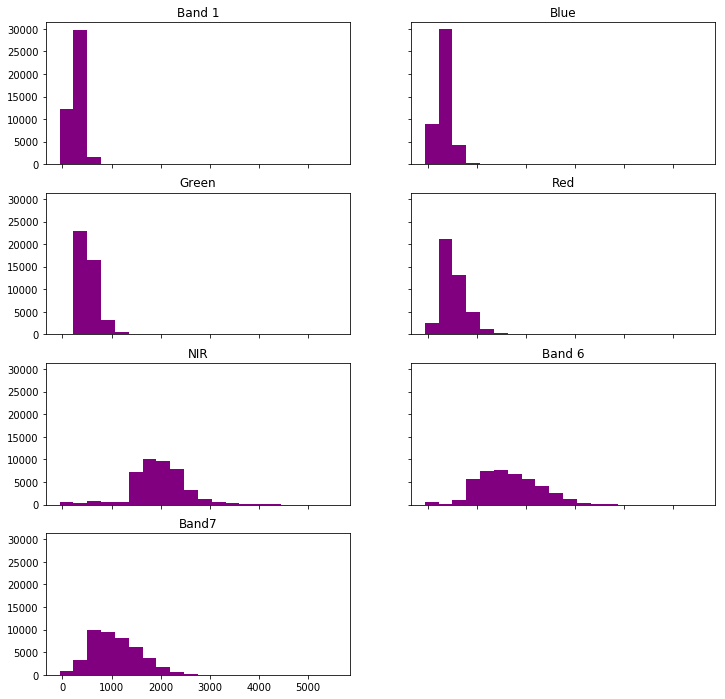

In [49]:
ep.hist(landsat_post_fire,
        title=band_titles)
plt.show()

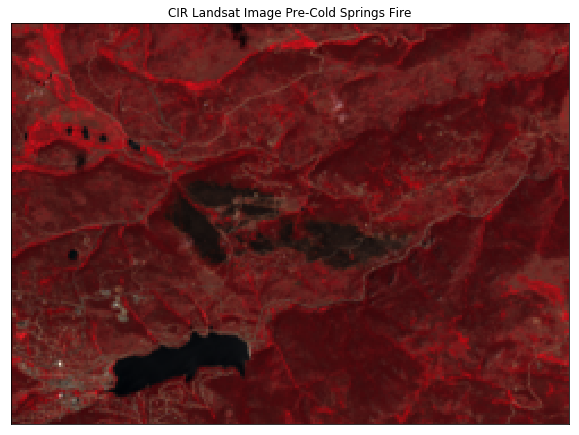

In [50]:
ep.plot_rgb(landsat_post_fire, rgb=[4, 3, 2],
            title="CIR Landsat Image Pre-Cold Springs Fire",
            figsize=(10, 10))
plt.show()